In [1]:
import numpy as np
from utils.option import parse
import torch
from model import ThreeStageModel
import tifffile
import matplotlib.pyplot as plt
import os

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [5]:
opt = parse('/home/schaudhary/siva_projects/SpatiallyAdaptiveSSID/option/train_care_planaria_2D.json')
# Model = getattr(__import__('model'), opt['model'])
model = ThreeStageModel(opt)
save_path = '/home/schaudhary/siva_projects/SpatiallyAdaptiveSSID/logs/train_care_planaria_2D_2/model_iter_00030000.pth'
# model.load_model(save_path, device)
load_dict = torch.load(save_path, map_location=device)

In [ ]:
npz_path = '/home/schaudhary/siva_projects/denoising/data/Denoising_Planaria/data_label.npz'
data = np.load(npz_path)['X']
data = split_train_test(data)
images = np.transpose(data, (0, 2, 1, 3, 4))
images = np.reshape(images, (-1, images.shape[2], images.shape[3], images.shape[4]))
# self.images = np.transpose(self.images, (0, 2, 3, 1))
images = np.repeat(images, 3, axis=1)

In [28]:
# base_path = '/home/schaudhary/siva_projects/denoising/data/Denoising_Planaria'
# base_path = '/home/schaudhary/siva_projects/denoising/data/Denoising_Tribolium/train_data'
base_path = '/home/schaudhary/siva_projects/denoising/data/Projection_Flywing/train_data'

# X = np.load(os.path.join(base_path, 'data_label_test.npz'))['X']
# Y = np.load(os.path.join(base_path, 'data_label_test.npz'))['Y']
# n2v_pred = np.load(os.path.join(base_path, 'n2v_pred_test.npz'))['n2v_pred']
# ssis_pred = np.load(os.path.join(base_path, 'ssid_pred_test_2.npz'))['ssid_pred']
diff_pred = np.load(os.path.join(base_path, 'pred_test_repaint_self.npz'))['diff_pred']

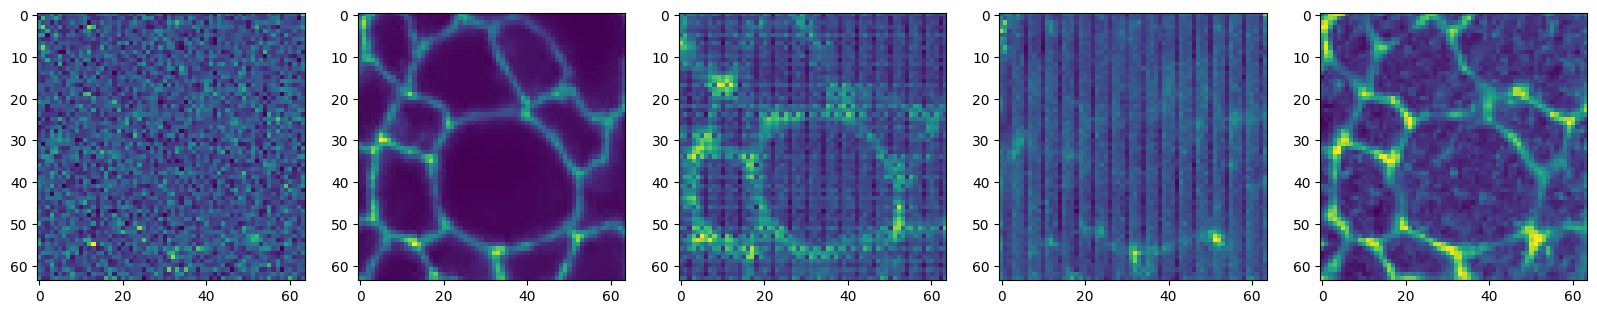

In [57]:
idx = 26
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(np.max(X[idx, 0], axis=0))
# ax[1].imshow(np.max(Y[idx, 0], axis=0))
ax[1].imshow(Y[idx, 0])
ax[2].imshow(np.max(ssis_pred[idx], axis=0))
# ax[3].imshow(np.max(n2v_pred[idx], axis=0))
ax[3].imshow(n2v_pred[idx])
ax[4].imshow(np.max(diff_pred[idx], axis=0))